In [1]:
# https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
dataset_1 = pd.read_csv('../../data/car.csv')

In [3]:
dataset_1.head()

,mpg,cyls,displacement,hp,weight,acc,year,origin,Unnamed: 8
0,18.0,8,307.0,130,3504,12.0,70,1,NaN
1,15.0,8,350.0,165,3693,11.5,70,1,NaN
2,18.0,8,318.0,150,3436,11.0,70,1,NaN
3,16.0,8,304.0,150,3433,12.0,70,1,NaN
4,17.0,8,302.0,140,3449,10.5,70,1,NaN


In [4]:
# Exploring the data in the dataset and describing all input categorical variables
dataset_1.describe(include=['O'])

ValueError: No objects to concatenate

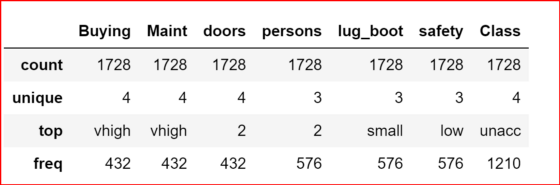

In [5]:
# Handling missing data, if any by dropping the null values
dataset_1 = dataset_1.dropna()

In [7]:
# We cannot run the classifier on text attributes. we need to convert categorical input features using LabelEncoder. 
# LabelEncoder will converts categorical variables into numbers.

le  = preprocessing.LabelEncoder()
dataset_1['Buying_1'] = le.fit_transform(dataset_1['Buying'])
dataset_1['Maint_1'] = le.fit_transform(dataset_1['Maint'])
dataset_1['doors_1'] = le.fit_transform(dataset_1['doors'])
dataset_1['persons_1'] = le.fit_transform(dataset_1['persons'])
dataset_1['lug_boot_1'] = le.fit_transform(dataset_1['lug_boot'])
dataset_1['safety_1'] = le.fit_transform(dataset_1['safety'])

In [ ]:
# printing the first two rows after converting categorical variables to numbers.
dataset_1.head(2)

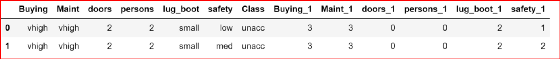

In [ ]:
# Now we will create the input features X and output feature Y from the dataset_1

X= dataset_1.iloc[:,[7,8,9,10,11,12]]
Y=dataset_1.iloc[:,6]

In [ ]:
# Splitting the dataset_1 to training and test sets. Test set will be 40% and training set will 60% of the dataset_1

from sklearn.cross_validation import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [ ]:
# we need to import KNeighborsClassifier as our problem is a classification problem. 
# For regression problem we use KNeighborsRegressor.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

# Here we have specified three parameters n_neighbors=5. This implies that we will take vore from 5 nearest neighbors 
# for feature similarity.
# Distance between the new point and the point in the dataset will be calculated using minkowski and p=2, 
# so the distance is euclidean distance.

In [ ]:
# Now that we have trained the dataset, we will fit our test set

Y_pred= classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average=’weighted’)))

#### Try with different K values and check how it impacts the accuracy and F1 score